# Testing GLORICH conversion constants

In [version 1.1](https://doi.org/10.5281/zenodo.5101057) of the Global River Water Quality Archive (GRQA) the conversion constants used for nitrate nitrogen (NO3N), nitrite nitrogen (NO2N) and ammonium nitrogen (NH4N) observations originating from the GLORICH dataset were as follows:
* NO3N: 0.000226
* NO2N: 0.000304
* NH4N: 0.000776

The constants were based on the assumption that the concentrations had been measured as NO3, NO2 and NH4 ($\mu mol L^{-1}$) in GLORICH as that had been the form in the European Waterbase dataset as well as GEMStat. Therefore, in order to convert them into their corresponding nitrogen form ($mg L^{-1}$) they had to be first divided by 1000, after which they were multiplied with the ratio of the molar masses of the final and original form of the parameter. For example, the conversion constant of NO3N was derived by dividing the molar mass of N (14.007) by the molar mass of NO3 (62.004) to get 0.22590478, which by further dividing by 1000 gave the conversion constant of **0.000226**.

However, the GLORICH observations were later analyzed by [Dr. Andreas Musolff](https://www.ufz.de/index.php?en=38352), who found that the concentrations of NO3N in the current version of GRQA were unreasonably low in the case of observation sites located in Germany. Therefore, it is likely that the assumed original forms of the three parameters were incorrect and that they had already been given in GLORICH as their corresponding nitrogen forms. Instead of the aforementioned conversion constants, the constants should have been **0.014007** in all three cases, as that was used for all the other parameters related to N (e.g. TN).

The following notebook compares the GLORICH concentrations originating from German observation sites by using both conversion constants.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Parameter used for testing
param = 'NO3N'

In [3]:
# Read data
dtypes = {
    'obs_id': object,
    'lat_wgs84': float,
    'lon_wgs84': float,
    'site_id': object,
    'site_country': object,
    'param_code': object,
    'obs_value': float,
    'source_obs_value': float,
    'source': object
}
data = pd.read_csv(f'../data/{param}_GRQA.csv', sep=';', usecols=dtypes.keys(), dtype=dtypes)
data.head()

,obs_id,lat_wgs84,lon_wgs84,site_id,site_country,param_code,obs_value,source_obs_value,source
0,77b346aaef3e0d5279d56bd17430858361b81c7811a4c9...,54.63444,-128.4092,BC08EF0001,Canada,NO3N,0.109,0.109,CESI
1,d32bce9227afda869ef927764873d5b829648b2786b228...,54.63444,-128.4092,BC08EF0001,Canada,NO3N,0.117,0.117,CESI
2,291fcecd60fa35f204908850e20b6f73fa45dd0d1310c4...,54.63444,-128.4092,BC08EF0001,Canada,NO3N,0.094,0.094,CESI
3,0be4931ce04b79cde6c0aed6aa61346a6d7186d32e1e6b...,54.63444,-128.4092,BC08EF0001,Canada,NO3N,0.098,0.098,CESI
4,449e19b204bd3bfe713910b46539b8f9ac2ec1851fbc80...,54.63444,-128.4092,BC08EF0001,Canada,NO3N,0.100,0.100,CESI


In [4]:
# Extract GLORICH data
glorich = data[data['source'] == 'GLORICH'].reset_index(drop=True)
display(glorich)

,obs_id,lat_wgs84,lon_wgs84,site_id,site_country,param_code,obs_value,source_obs_value,source
0,8415be97d0be045936189ea53b30cdf642398fe57aa91d...,-29.006102,29.910528,410402,RSA,NO3N,0.017854,79.000,GLORICH
1,663ec6f5186385b0e59b109e58756d5fda085be573588e...,-28.714618,29.402481,410403,RSA,NO3N,0.011526,51.000,GLORICH
2,1403f6a7b434dd91047e8296af7ca0b8454737db8ff35b...,-28.560452,29.751909,410405,RSA,NO3N,0.056952,252.000,GLORICH
3,b43cbabe9ff67bbcbe2c8be8cd92d323e0fb477155c503...,-27.835184,30.581625,410407,RSA,NO3N,0.001582,7.000,GLORICH
4,192debed37cbffc088468bf94a2f9bef6319e6d9c0a316...,-27.648044,31.493733,410408,RSA,NO3N,0.001130,5.000,GLORICH
...,...,...,...,...,...,...,...,...,...
182651,359a6dcaadbc3c5cace3d91b8921d6deb1ac95ac96001d...,35.411753,136.014434,540563,Japan,NO3N,0.002260,10.000,GLORICH
182652,e090259de1781e5391444d7ba7dc031c361024b4dcf6bf...,35.411753,136.014434,540563,Japan,NO3N,0.001291,5.714,GLORICH
182653,efcc3a03990af72da4960e5380ee77813e6192d79a5f0e...,35.411753,136.014434,540563,Japan,NO3N,0.003229,14.286,GLORICH
182654,21872ad3d3eec641a7d34da6e8a9f3ed468a1bc22f97bf...,35.411753,136.014434,540563,Japan,NO3N,0.002906,12.857,GLORICH


In [5]:
# Dictionary with new constants
new_constants = {
    'NO3N': 0.014007,
    'NO2N': 0.014007,
    'NH4N': 0.014007
}

In [6]:
# Calculate new concentrations using the new constant
glorich['new_obs_value'] = glorich['source_obs_value'] * new_constants[param]
display(glorich)

,obs_id,lat_wgs84,lon_wgs84,site_id,site_country,param_code,obs_value,source_obs_value,source,new_obs_value
0,8415be97d0be045936189ea53b30cdf642398fe57aa91d...,-29.006102,29.910528,410402,RSA,NO3N,0.017854,79.000,GLORICH,1.106553
1,663ec6f5186385b0e59b109e58756d5fda085be573588e...,-28.714618,29.402481,410403,RSA,NO3N,0.011526,51.000,GLORICH,0.714357
2,1403f6a7b434dd91047e8296af7ca0b8454737db8ff35b...,-28.560452,29.751909,410405,RSA,NO3N,0.056952,252.000,GLORICH,3.529764
3,b43cbabe9ff67bbcbe2c8be8cd92d323e0fb477155c503...,-27.835184,30.581625,410407,RSA,NO3N,0.001582,7.000,GLORICH,0.098049
4,192debed37cbffc088468bf94a2f9bef6319e6d9c0a316...,-27.648044,31.493733,410408,RSA,NO3N,0.001130,5.000,GLORICH,0.070035
...,...,...,...,...,...,...,...,...,...,...
182651,359a6dcaadbc3c5cace3d91b8921d6deb1ac95ac96001d...,35.411753,136.014434,540563,Japan,NO3N,0.002260,10.000,GLORICH,0.140070
182652,e090259de1781e5391444d7ba7dc031c361024b4dcf6bf...,35.411753,136.014434,540563,Japan,NO3N,0.001291,5.714,GLORICH,0.080036
182653,efcc3a03990af72da4960e5380ee77813e6192d79a5f0e...,35.411753,136.014434,540563,Japan,NO3N,0.003229,14.286,GLORICH,0.200104
182654,21872ad3d3eec641a7d34da6e8a9f3ed468a1bc22f97bf...,35.411753,136.014434,540563,Japan,NO3N,0.002906,12.857,GLORICH,0.180088


Now we can calculate some descriptive statistics of both versions of concentrations.

First, let us display the statistics of the current concentrations.

In [7]:
# Display German statistics based on the current version
glorich[glorich['site_country'] == 'Germany']['obs_value'].describe()

count    118052.000000
mean          0.063115
std           0.035838
min           0.000081
25%           0.037102
50%           0.061299
75%           0.083832
max           1.438915
Name: obs_value, dtype: float64

Finally, let us display the statistics of the newly calculated concentrations.

In [8]:
# Display German statistics based on the new version
glorich[glorich['site_country'] == 'Germany']['new_obs_value'].describe()

count    118052.000000
mean          3.911704
std           2.221165
min           0.005000
25%           2.299501
50%           3.799189
75%           5.195715
max          89.180902
Name: new_obs_value, dtype: float64

We can see a clear difference in the mean values. The mean concentration derived by using the constant 0.000226 was only **0.063115**, whereas the mean derived using the constant 0.014007 was **3.911704**. The former sounds far more reasonable!

We can also compare the spread of concentration values of the corresponding box plots.

Text(0, 0.5, '$mg L^{-1}$')

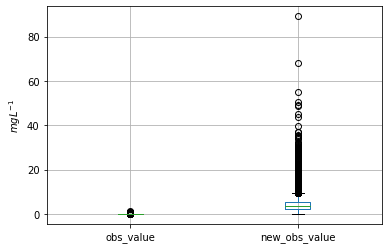

In [9]:
fig, ax = plt.subplots(1, 1)
ax = glorich[glorich['site_country'] == 'Germany'].boxplot(column=['obs_value', 'new_obs_value'])
ax.set_ylabel('$mg L^{-1}$')

Although obvious outliers still remain, the range of values looks a lot more realistic.